# Global YouTube Statistics
---

### Is there a correlation between population in education or unemployment rate and the number of successful YouTube channels for each country?

In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Get cleaned data CSV
youtube_df = pd.read_csv("../Cleaned_Data/cleaned_youtube_data.csv", encoding="iso-8859-1")

# Preview data
youtube_df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,country_rank,lowest_yearly_earnings,highest_yearly_earnings,created_year,created_month,Gross tertiary education enrollment (%),Population,Unemployment rate,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,1,6800000,108400000,2006,Mar,28.1,1366417754,5.36,20.593684,78.962880
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,7670,0,0,2006,Mar,88.2,328239523,14.70,37.090240,-95.712891
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,1,4000000,64700000,2012,Feb,88.2,328239523,14.70,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,2,5900000,94800000,2006,Sep,88.2,328239523,14.70,37.090240,-95.712891
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,2,5500000,87500000,2006,Sep,28.1,1366417754,5.36,20.593684,78.962880


In [2]:
# Show unique country count
len(youtube_df["Country"].unique())

48

In [4]:
# Separate out the Education and Unemployment Rate per country
country_rates = youtube_df[["Country","Gross tertiary education enrollment (%)","Unemployment rate"]]

# Remove duplicate rows
country_rates = country_rates.drop_duplicates().set_index("Country")

# Check Len = Number of unique country's
print(f"There are {len(country_rates)} Countries in this DataFrame.")

country_rates.head()

There are 48 Countries in this DataFrame.


,Gross tertiary education enrollment (%),Unemployment rate
Country,,
India,28.1,5.36
United States,88.2,14.70
Japan,63.2,2.29
Russia,81.9,4.59
South Korea,94.3,4.15


In [5]:
# Remove un-required columns for analysis
col_reduce_df = youtube_df[["Youtuber","subscribers","video views","uploads","Country"]]

# Preview
col_reduce_df.head()

,Youtuber,subscribers,video views,uploads,Country
0,T-Series,245000000,228000000000,20082,India
1,YouTube Movies,170000000,0,1,United States
2,MrBeast,166000000,28368841870,741,United States
3,Cocomelon - Nursery Rhymes,162000000,164000000000,966,United States
4,SET India,159000000,148000000000,116536,India


In [24]:
# Group and obtain number of Youtubers per country
yt_per_country = col_reduce_df.groupby("Country").size()

# Create a DataFrame ready for plotting using the above grouping as the first column
yt_plot_df = pd.DataFrame({"# YouTuber's":yt_per_country}).sort_values("# YouTuber's", ascending=False)

yt_plot_df.head()

,# YouTuber's
Country,
United States,289
India,161
Brazil,61
United Kingdom,42
Mexico,32


In [25]:
# Merge with the 'country_rates' df to obtain Unemployment and Education % for each country
merge_plot_df = pd.merge(yt_plot_df,country_rates, on="Country")

# Preview DataFrame
merge_plot_df.head()

,# YouTuber's,Gross tertiary education enrollment (%),Unemployment rate
Country,,,
United States,289,88.2,14.70
India,161,28.1,5.36
Brazil,61,51.3,12.08
United Kingdom,42,60.0,3.85
Mexico,32,40.2,3.42


In [54]:
# Rename columns to be more clear
merge_plot_df = merge_plot_df.rename(columns={"Gross tertiary education enrollment (%)":"Education Enrollment (%)",
                                             "Unemployment rate":"Unemployment Rate (%)"})

merge_plot_df = merge_plot_df.iloc[2:len(merge_plot_df)-1,:]

merge_plot_df.head()

,# YouTuber's,Education Enrollment (%),Unemployment Rate (%)
Country,,,
Brazil,61,51.3,12.08
United Kingdom,42,60.0,3.85
Mexico,32,40.2,3.42
Indonesia,27,36.3,4.69
Spain,21,88.9,13.96


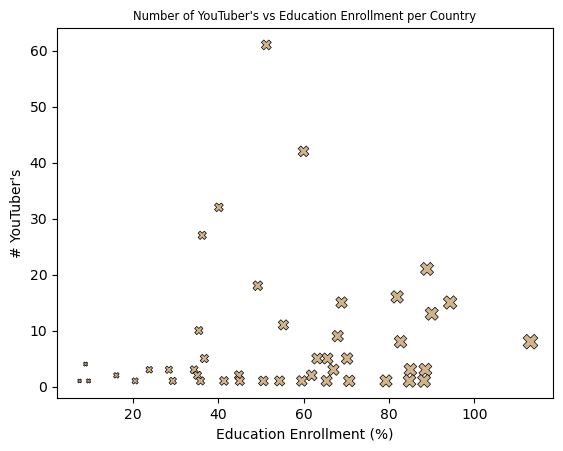

In [55]:
# Plot Education vs YouTuber's
merge_plot_df.plot(kind="scatter", x="Education Enrollment (%)",y="# YouTuber's",
                  marker="X", color="tan", linewidth=0.5, edgecolor="black", s="Education Enrollment (%)")
plt.title("Number of YouTuber's vs Education Enrollment per Country", size="small")
plt.show()

The correlation between Education Enrollment and the number of top YouTuber's is 0.11


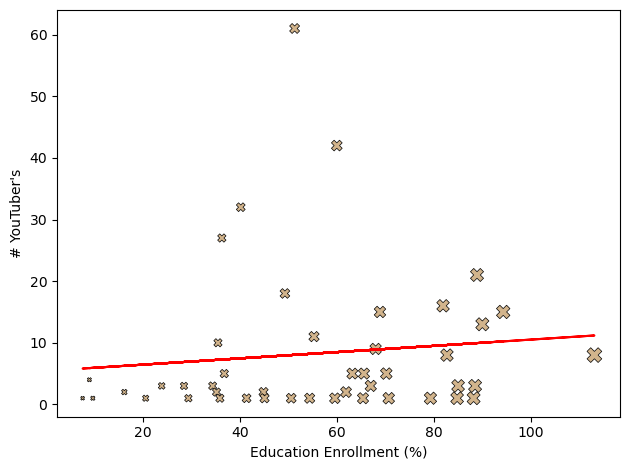

In [56]:
# Correlation calc
correlation = st.pearsonr(merge_plot_df["Education Enrollment (%)"],merge_plot_df["# YouTuber's"])
print(f"The correlation between Education Enrollment and the number of top YouTuber's is {round(correlation[0],2)}")

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(merge_plot_df["Education Enrollment (%)"],merge_plot_df["# YouTuber's"])
regress = merge_plot_df["Education Enrollment (%)"] * slope + intercept
line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")

# Plot Graph
merge_plot_df.plot(kind="scatter", x="Education Enrollment (%)",y="# YouTuber's",
                  marker="X", color="tan", linewidth=0.5, edgecolor="black", s="Education Enrollment (%)")
plt.plot(merge_plot_df["Education Enrollment (%)"],regress,"r")
plt.annotate(line_eq,(70,100),color="red",fontsize=8)
plt.tight_layout()
plt.show()